In [1]:
using Plots
using LaTeXStrings
using Revise
using LinearAlgebra
using DualNumbers
using Random
using Distributions


pyplot()
# Set default fonts for all plots
#fnt = Plots.font("DejaVu Sans", 8.0)
#default(titlefont=fnt, guidefont=fnt, tickfont=fnt, legendfont=fnt)

Plots.PyPlotBackend()

In [2]:
# Need Golden Section Search
include("files/code/gss.jl")

function gradient_descent_plot(f, gamma, xpos, ypos)
    n = 100
    x = range(-10.0,stop=10.0,length=n)
    y = range(-10.0,stop=10.0,length=n)

    xgrid = repeat(x',n,1)
    ygrid = repeat(y,1,n)
    z = zeros(n,n)

    for i in 1:n
        for j in 1:n
            z[i:i,j:j] .= f([x[j];y[i]], gamma)
        end
    end
    p = contour(xgrid, ygrid, z, colors="black", linewidth=1.0, colorbar=false, aspect_ratio=1)
    plot!(xpos, ypos, label="")
    scatter!(xpos, ypos, label="")
    return p
end

function gradient_descent_convergence_plot(xpos1, ypos1, xpos2, ypos2, labels)
    p=plot()
    n = length(xpos1)
    steps = 1:n
    dist = [sqrt(xpos1[i]^2+ypos1[i]^2) for i in steps]
    p = plot(steps, dist, yscale=:log10, label="", color=:blue, xlabel="# iterations", ylabel=L"\left|\mathbf{x}-\mathbf{x}^* \right|")
    scatter!(steps, dist, color=:blue, label=labels[1])
    
    n = length(xpos2)
    steps = 1:n
    dist = [sqrt(xpos2[i]^2+ypos2[i]^2) for i in steps]
    plot!(steps, dist, yscale=:log10, label="", color=:green)
    scatter!(steps, dist, color=:green, label=labels[2])
    
    return p
end

function gradient_descent(f, df, gamma)
    x0 = [10.0, 1.0]

    g = df(x0, gamma)
    n = 0 
    x = x0
    dx = - g / norm(g)

    steps = Int[]
    xposition = Float64[]
    yposition = Float64[]

    while n<20 && norm(g)>1E-5
        append!(steps,n); append!(xposition, x[1]); append!(yposition, x[2]);
        F(lambda) = f(x + lambda*dx, gamma)
        lmin = gss.minimise(F, [-100.0, 100.0, 0.0], 1.0E-6)
        x = x + lmin*dx
        g = df(x, gamma)
        dx = -g/norm(g)
        n+=1
    end
    return xposition, yposition
end

function gradient_descent(f, df, gamma)
    x0 = [10.0, 1.0]

    g = df(x0, gamma)
    n = 0 
    x = x0
    dx = - g / norm(g)

    steps = Int[]
    xposition = Float64[]
    yposition = Float64[]

    while n<20 && norm(g)>1E-5
        append!(steps,n); append!(xposition, x[1]); append!(yposition, x[2]);
        F(lambda) = f(x + lambda*dx, gamma)
        lmin = gss.minimise(F, [-100.0, 0.0, 100.0], 1.0E-6)
        x = x + lmin*dx
        g = df(x, gamma)
        dx = -g/norm(g)
        n+=1
    end
    return xposition, yposition
end

function ADplot()
    xgrid1 = range(-1.0,stop=1.0,length=101)
    xgrid2 = range(-1.0,stop=1.0,length=51)
    z = [Dual(x, 1.0) for x in xgrid2]
    y = sin.(2*pi*xgrid1)
    yprime = 2*pi*cos.(2*pi*xgrid1)
    yz = sin.(2*pi*z)
    p = plot(xgrid1, y, label=L"y(x) = \sin(2\pi x)", color=:red, ylims=(-7,16))
    plot!(xgrid1, yprime, label=L"y(x) = 2\pi\,\cos(2\pi x)", color=:blue)
    scatter!(xgrid2, realpart.(yz), label="Real[y(z)]", color=:red)
    scatter!(xgrid2, dualpart.(yz), label="Dual[y(z)]", color=:blue)
    return p
end

ADplot (generic function with 1 method)

## MA934

## Nonlinear optimisation


### Minimisation in 1 dimension

Given a function, $f(x)$ of a single variable, the task is to find a minimum of $f$. 

An ordered triple of points $(a,c,b)$ is said to *bracket* a minimum of $f$ if $f(c) < f(a)$ and $f(c) < f(b)$.

Line search: evaluate  $f$  at a new point,  $x$, to construct a smaller bracketing triple. Iterate until a desired accuracy is reached.

<img src="files/images/minf.png" alt="array" style="width: 400px;"/>  

Golden section search is a way to organise this search in an optimal way.

### Golden section search

<img src="files/images/gss_intervals.png" alt="array" style="width: 800px;"/> 

Most efficient to choose  $x$  in the larger of the two subintervals: 




### Golden section search:  : choosing new point, $x$

**Case 1**: $[a, c]$ is the larger subinterval : new bracketing triple is either $(a,x,c)$  or $(x,c,b)$. Width of the new bracketing triple is independent of which outcome if :
$$
c - a = b - x.
$$
So we choose
$$
x = a + b - c.
$$


**Case 2**: if $[c,b]$ is the larger subinterval: new bracketing triple is either $(a,c,x)$ or $(c,x,b)$.  Width of the new bracketing triple is independent of which outcome if :
$$
x - a = b - c.
$$
So we again choose
$$
x = a + b -c.
$$

### Golden section search : choosing initial "shape"

<img src="files/images/gss_intervals.png" alt="array" style="width: 400px;"/> 

The idea is to choose $c$ such that the ratio of the width of the shorter subinterval to the width of the longer one remains constant between iterations.

Denote:

* $p$: width of the longer subinterval in the old triple 
* $q$: width of the shorter subinterval in the old triple.
* $r$ width of shorter subinterval in the *new* triple.

There are several cases:

### Golden section search : choosing initial "shape"


Case 1:

> Case 1(A) : $\frac{r}{p-r} = \frac{q}{p}$
> Case 1(B) : $\frac{r}{q} = \frac{q}{p}$

Case 2: (get same equations) 
> Case 2(A) : $\frac{r}{q} = \frac{q}{p}$  
> Case 2(B) : $\frac{r}{p-r} = \frac{q}{p}$

<img src="files/images/gss_intervals.png" alt="array" style="width: 400px;"/> 

Eliminating $r$ gives

$$
\begin{align*}
\left(\frac{q}{p} \right)^2 &+ \left(\frac{q}{p} \right) - 1 = 0 \\ 
\Rightarrow \left(\frac{q}{p} \right) &= \frac{\sqrt{5}\pm 1}{2}.
\end{align*}
$$

### Golden section search

We choose the - sign since we assumed $\frac{q}{p}<1$ ($\frac{q}{p} = \phi$, 1/golden ratio). 

Since $x$ is already determined, $x=a+b−c$, if we start with the correct ratio,  $\frac{q}{p}$ , this will be preserved when as we iterate.

Convergence is exponential in the number of iterations: width of interval after $n$ iterations is $(b-a)\,\phi^n$.



### Golden section search: convergence

Finding the minimum of  $f(x)=x^2$  at  $x=0$:

<img src="files/images/gss_convergence.png" alt="array" style="width: 800px;"/> 

### Golden section search : implementation

Implementation is simplified using temporary variables $x_1$ and $x_2$ to store the points $x$ and $c$ (in Case 1) or $c$ and $x$ (in Case 2) and $f_1$ and $f_2$ to store the associated function values. 

Regardless of the order in which previous points were evaluated, the new triple will centre on the point with the smallest value of $f$ found so far. Thus by comparing $f_1$ to $f_2$, there are only two cases:


<img src="files/images/gss_implementation.png" alt="array" style="width: 400px;"/> 



### Minimisation in $\mathbb{R^n}$ : line minimisation

Given a function, $f: \mathbb{R}^n \to \mathbb{R}$, a position vector, $\mathbf{x} \in \mathbb{R}^n$, and a direction vector, $\mathbf{v} \in \mathbb{R}^n$, the *line minimiser* of $f$ from $\mathbf{x}$ in the direction $\mathbf{v}$ is the point 
$$
\mathbf{x}^* = \mathbf{x} + \lambda^*\,\mathbf{v}
$$ 
where
$$
\lambda^* = \arg \min_\lambda f(\mathbf{x} + \lambda\,\mathbf{v}).
$$
Note that although  $f$ is a function of $n$ variables, this minimisation with respect to $\lambda$ is one dimensional and can be done, for example, using Golden Section Search.

### Minimisation in $\mathbb{R^n}$ : gradient descent

Gradient descent is one a family of unconstrained optimisation algorithms that can be used when the gradient of the objective function is known or computable.

* Given $f : \mathbb{R}^n \to \mathbb{R}$ and any point, $\mathbf{x} \in \mathbb{R}^n$, $-\nabla f(\mathbf{x})$ points in the direction of steepest decrease of $f$ at $\mathbf{x}$.
* Idea is to keep going "downhill" until a minimum is reached

### Gradient descent algorithm

Start from a point, $\mathbf{x}_0$.

1. Calculate the unit direction vector 
$$\mathbf{v}_n = - \frac{\nabla\,f(\mathbf{x}_n)}{\left| \nabla\,f(\mathbf{x}_n)\right|}.$$
2. Perform line minimisation in direction of $\mathbf{v}_n$:
$$
\lambda^* = \arg \min_\lambda f(\mathbf{x}_n + \lambda\,\mathbf{v}_n)
$$

3. Move to new position $\mathbf{x}_{n+1} = \mathbf{x}_n + \lambda^*\,\mathbf{v}_n$. 
4. Repeat until $\left| \nabla\,f(\mathbf{x}_n) \right| < \epsilon_\text{tol}$.

Normalisation of $\mathbf{v}_n$ is not strictly necessary but helps keep accuracy as minimum is approached.

Note: any descent directions will work - gradient is the most efficient.

### Gradient descent: example in $\mathbb{R}^2$

Consider the function
$$
f(x, y) = \frac{1}{2}\left(x^2 + \gamma y^2 \right).
$$
The parameter $\gamma>0$ controls the ellipticity.
The gradient is
$$
\nabla\,f(x,y) = (x, \gamma\,y)^T.
$$

In [ ]:
# Parameter to control ellipticity of the bowl
gamma = 10.0
# Define quadratic function of two variables 
f(x, gam) = 0.5*(x[1]^2.0 + gam*x[2]^2.0)
# Define corresponding gradient
df(x, gam) = [x[1], gam*x[2]]


### Gradient descent: example in $\mathbb{R}^2$

In [ ]:
gamma=4.0
xpos1, ypos1 = gradient_descent(f, df, gamma)
gradient_descent_plot(f, gamma, xpos1, ypos1)

In [ ]:
gamma=10.0
xpos2, ypos2 = gradient_descent(f, df, gamma)
gradient_descent_plot(f, gamma, xpos2, ypos2)

### Gradient descent: Why the zig zags? 


Remember that $\mathbf{x}_{n+1}$ is a line minimiser of $f$ from $\mathbf{x}_n$ in the direction of $\mathbf{v}_n$. 

Letting $g(\lambda) = f(\mathbf{x}_n + \lambda\,\mathbf{v}_n)$, we must have
$$
\begin{align*}
\frac{d\,f}{d\,\lambda}(\lambda^*) &= 0\\
\Rightarrow \sum_{i=1}^n \frac{\partial\,f}{\partial\,x_i}(\mathbf{x}_n+\lambda^*\mathbf{v}_n) \,v_{n\,i} &=0\\
\Rightarrow \nabla\,f(\mathbf{x}_{n+1}) \cdot \mathbf{v}_n &= 0.
\end{align*}
$$

Each step of the gradient descent algorithm is perpendicular to the previous one.

### Gradient descent: convergence

* convergence is exponential but depends on $\gamma$.
* larger $\gamma$ is harder - narrower valley requires more zig zags.
* this latter feature means vanilla gradient descent is rarely used in practice.

In [ ]:
gradient_descent_convergence_plot(xpos1, ypos1, xpos2, ypos2, [L"\gamma=4", L"\gamma=15"])

### Numerical calculation of derivatives

Explicit calculation of $\nabla\,f(\mathbf{x})$ is sometimes inconvenient. In such cases it is helpful to be able to calculate derivatives numerically. Several approaches:

* Finite difference approximation: the workhorse.
* Automatic differentiation: uses dual numbers
* Spectral methods: uses Fourier transforms

### Dual Numbers: basic arithmetic

Dual numbers are of the form $z = x + \varepsilon\, y$ with $x$, $y \in \mathbb{R}$ and $\varepsilon^2 = 0$.

Addition rule:
$$
\begin{align*}
z_1 + z_2 & = (x_1 + \varepsilon\,y_1) +  (x_2 + \varepsilon\,y_2)\\
 & =  (x_1 + x_2) + \varepsilon\,(y_1+y_2).
 \end{align*}
 $$
 

Multiplication rule:
$$
 \begin{align*}
z_1 * z_2 & = (x_1 + \varepsilon\,y_1) *  (x_2 + \varepsilon\,y_2) \\
& =  (x_1 x_2) + \varepsilon\,(x_1\,y_2+x_2\, y_1).
\end{align*}
$$

Dual conjugate:
$$
\bar{z} = x - \varepsilon\, y.
$$

As with the complex numbers, $z\,\bar{z}$ is purely real:
$$
z\,\bar{z} = (x + \varepsilon\,y) * (x - \varepsilon\,y)  = x^2.  
$$

### Dual numbers: division and powers

Division is defined using the conjugate:
$$
\begin{align*}
\frac{z_1}{z_2} &= \frac{z_1\,\bar{z}_2}{z_2 \bar{z}_2}\\
&= \frac{(x_1 + \varepsilon\,y_1) (x_2 - \varepsilon\,y_2) }{x_2^2}\\
&= \frac{x_1\,x_2 + \varepsilon\,(y_1\,x_2 - x_1\,y_2)}{x_2^2}\\
&= \frac{x_1}{x_2} + \varepsilon\,\left( \frac{y_1\,x_2 - x_1\,y_2}{x_2^2}\right).
\end{align*}
$$



Division is not defined for $\text{Re}(z_2) = 0$ so, unlike $\mathbb{C}$, the dual numbers do not form a field.

Powers are obtained using the binomial theorem:
\begin{align}
\nonumber (x+ \varepsilon\, y)^n & = \sum_{k=0}^n \binom{n}{k}\,x^{n-k}\, (\varepsilon\, y)^k\\
\nonumber &= \binom{n}{0} x^n + \binom{n}{1}\,x^{n-1}\,\varepsilon\, y\\
\label{eq-ADpower} & = x^n + \varepsilon\, y\, n\,x^{n-1}.
\end{align}

### Dual numbers: automatic differentiation

Notice that for $f(x) = x^n$,

$$
f(x+\varepsilon\,y) = f(x) + \varepsilon\,y\, f^\prime(x).
$$

Evaluating $f(x) = x^n$ at $x + \varepsilon$ gives the derivative of $f(x)$ as the dual component.

This is called *automatic differentiation*.


This property trivially extends to polynomial functions and *formally* extends to real analytic functions via their Taylor series:

$$
\begin{align*}
&f(x + \varepsilon\,y) = \sum_{k=0}^\infty \frac{1}{k!}\,f^{(k)}(x)\, \varepsilon^k\,y^k\\
& =  f(x) + \varepsilon\,y\, f^\prime(x).
\end{align*}
$$

Also the chain rule works (check). If  $h(x) = f(g(x))$:

$$
h(x + \varepsilon) = f(g(x)) + \varepsilon\,f^\prime(g(x))\,g^\prime(x).
$$


### Dual numbers in Julia

Advantages of automatic differentiation:
* no need to work out complicated analytic formulae for derivatives
* $\text{Dual}[z]$ correct to the same precision as $\text{Real}[z]$.

Dual arithmetic is supported in Julia by various packages, the most basic of which is DualNumbers.jl. 

In [4]:
using DualNumbers
z1 = Dual(2.0,3.0)
z2 = Dual(1.0, 2.0)
z1*z2

2.0 + 7.0ɛ

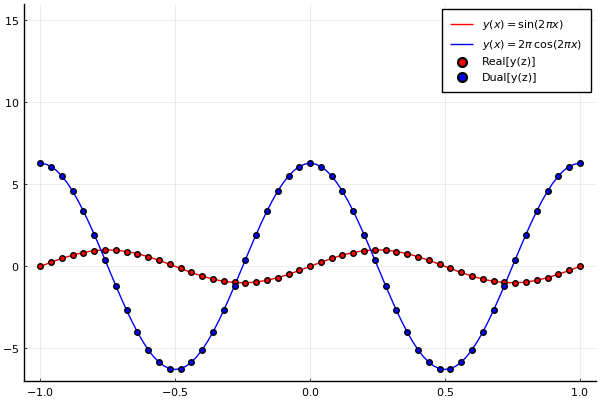

In [5]:
x = range(-1.0,stop=1.0,length=101)
z = [Dual(a, 1.0) for a in x]
y = sin.(2*pi*x)
ADplot()

### Automatic differentiation for multivariate functions

In the formulation presented above, automatic differentiation of multivariate functions requires a separate function evaluation for each partial derivative.

For a multivariate function $f : \mathbb{R}^n \to \mathbb{R}$, to calculate the partial derivative with respect to $x_i$, we have to add $\varepsilon$ to the $i^\text{th}$ component of the argument and then take the dual part.
For example, in $\mathbb{R}^2$ we have
$$
\begin{align*}
f(x + \varepsilon, y) &= f(x,y) + \varepsilon\,\frac{\partial f}{\partial x} (x,y)\\
f(x, y + \varepsilon) &= f(x,y) + \varepsilon\,\frac{\partial f}{\partial y} (x,y).
\end{align*}
$$

### Minimisation of sums

Problems in statistical inference, ML and data science frequently produce optimisation problems that involve minimising a sum:
$$
\min_\beta f(\beta) = \min_\beta \frac{1}{n}\sum_{i=1}^n L(\beta, \mathbf{x}_i).
$$
Often $\beta$ represents some model parameters, $\mathbf{x}_i$ represents the $i^\text{th}$ observation in the training data set and $L$ is a loss function of some kind.

Can be solved with GD by calculating the gradient with respect to $\beta$:
$$
(\nabla f(\beta))_j = \frac{1}{n}\sum_{i=1}^n \frac{\partial\, L}{\partial\, \beta_j}(\beta, \mathbf{x}_i)
$$


### Stochastic Gradient Descent

If the training data is large ($n \gg 1$), then calculating the gradient can become very expensive.  Stochastic Gradient Descent addresses this issue.

Idea is to estimate the gradients as:

$$
(\nabla f(\beta))_j \approx (\tilde{\nabla} f(\beta))_j = \frac{\partial\, L}{\partial\, \beta_j}(\beta, \mathbf{\tilde{x}}_{i})
$$

where $\tilde{\mathbf{x}}_i$ is the $i^\text{th}$ training data point from the training data set having first undergone a random shuffle.




### Stochastic Gradient Descent : learning rate

With SGD, we typically do not perform full line minimisations (due to sampling noise). Instead the basic update rule is
$$
\mathbf{\beta}_{n+1} = \mathbf{\beta}_n - \zeta_n\,(\tilde{\nabla} f(\beta_n)). 
$$
$\zeta_n$ is a (decreasing) function of $n$ often called the *learrning rate*. For example,

$$
\zeta_n = \frac{\zeta_0}{1+\zeta_1\,n}
$$

$\zeta_0$ and $\zeta_1$ are *hyperparameters*. Note that $\sum_{n=1}^\infty \zeta_n$ is a divergent series. Prevents SGD from stalling.

Due to sampling noise, SGD only converges to a "noise ball" around the minimum of $f(\beta)$ rather than to the true minimum.

In [3]:
include("files/code/figures.jl")
pyplot()

Plots.PyPlotBackend()

### Example: Logistic regression

Binary variable, $Y \in \left\{0, 1\right\}$, explanatory variable, $X \in \mathbb{R}$. 

Example: how is going crazy ($Y$) related to the number of hours per week ($X$) spent on MS Teams?

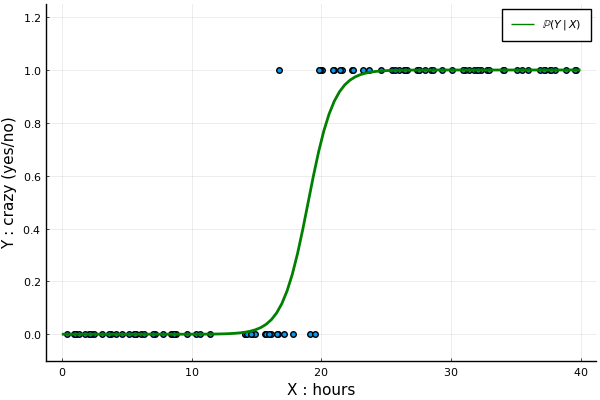

In [6]:
figures.plot_logistic_regression_data([0.0, 40.0] , [-19.0, 1.0], 100)

Assume $Y = \left\{Y_i, i=1\ldots n \right\}$ are id Bernoulli with parameters, $p_i$, depending on $X = \left\{X_i, i=1\ldots n \right\}$:
$$
\mathbb{P}(Y | X) = \prod_{i=1}^n p(X_i)^{Y_i} \, (1 -p(X_i))^{1-Y_i}
$$

### Example: Logistic regression

How should Bernoulli parameter, $p$, vary with $X$?  
Assume *log odds* are a linear function of $X$:
$$
\log\left(\frac{p(X)}{1-p(X)} \right) = \beta_0 + \beta_1\,X = \beta \cdot \mathbf{X}
$$
where $\mathbf{X} = \left(1, X\right)$ and $\beta = \left(\beta_0, \beta_1\right)$.

Solve for $p(X)$:
$$
p(X) = \sigma(\beta\cdot\mathbf{X}),
$$
where $\sigma(x)$ is the sigmoid function:
$$
\sigma(x) = \frac{1}{1+\exp(-x)}.
$$

### Example: Logistic regression as an optimisation problem

Obviously cannot use least squares to select optimal values of $\beta$. 

Instead maximise, $\mathbb{P}(Y | X) $ - *likelihood of $Y$ given $X$* - with respect to $\beta$. 

In fact easier to minimise $-\log \mathbb{P}(Y | X)$ because it turns task into a sum minimisation: 

$$
\beta_* = \arg \min_{\beta} \sum_{i=1}^n -Y_i\,\log(\sigma(\beta\cdot\mathbf{X}_i)) - (1 -Y_i)\,\log(1-\sigma(\beta\cdot\mathbf{X}_i)).
$$

### Example: Logistic regression via gradient descent

We can solve this sum minimisation problem with GD or SGD. First we need the gradient of the objective function,
$$
L(\beta) = \sum_{i=1}^n -Y_i\,\log(\sigma(\beta\cdot\mathbf{X}_i)) - (1 -Y_i)\,\log(1-\sigma(\beta\cdot\mathbf{X}_i)).
$$
Direct calculation gives (check)
$$
(\nabla L (\beta))_k = \sum_{i=1}^n (\sigma(\beta\cdot\mathbf{X}_i)) - Y_i)\,(\mathbf{X}_i)_k
$$
where $k\in\left\{0,1\right\}$ and $(\mathbf{X}_i)_k$ is the k$^\text{th}$ component of $\mathbf{X}_i$.

### Implementation: generate some test data

In [7]:
n = 1000 # Number of data points
xrange = [-20.0, 20.0] # Range of values for x
β0 = [1.0, 1.0] # True parameter values

sigmoid(x) = 1.0/(1.0+exp(-x))

# Generate some data
Random.seed!(2)
X = zeros(n,2)
X[:,1] .= 1.0
X[:,2] = rand(Uniform(xrange[1], xrange[2]), n)
Y = [rand(Bernoulli(sigmoid(β0⋅X[i,:]))) for i in 1:n]

1000-element Array{Bool,1}:
 0
 1
 0
 1
 1
 1
 1
 0
 1
 1
 0
 1
 0
 ⋮
 0
 1
 0
 1
 0
 0
 1
 1
 0
 1
 0
 1

### Implementation: define the objective function

Need negative log likelihood of the data $(\mathbf{X}, \mathbf{Y})$ for a given value of $\beta$.  
First calculate the components of the sum as separate lists and then assemble them at end:

In [8]:
function L(β)
    S = [ sigmoid(β⋅X[i,:]) for i in 1:n]
    # It *can* happen that S[i]==0.0 or 1.0 due to finite precision. This needs to 
    # be handled separately to avoid log(0). Use the ? :  ternary operator
    A1 = [S[i] == 0.0 ? 0.0 : Y[i]*log(S[i]) for i in 1:n]
    A2 = [S[i] == 1.0 ? 0.0 : (1-Y[i])*log(1.0-S[i]) for i in 1:n]
    A = [A1[i] + A2[i] for i in 1:n]
    return -1.0*sum(A)
end

L (generic function with 1 method)

### Plot of L(β)

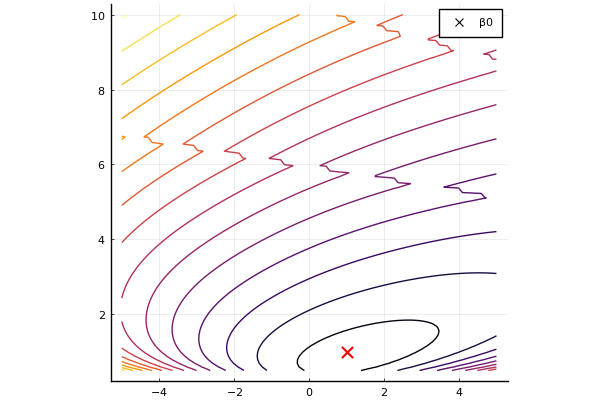

In [9]:
p = figures.contour_plot(L, [-5.0,5.0], [0.5, 10.0])
scatter!([β0[1]],[β0[2]], marker=:x, markersize=8, label="β0",  color=:red)

### Implementation: define the gradient of the objective function

In [10]:
# Define the gradient of the likelihood function with respect to β
function dL(β)
    S = [ sigmoid(β⋅X[i,:]) for i in 1:n]
    A1 = [(S[i] - Y[i])*X[i,1] for i in 1:n]
    A2 = [(S[i] - Y[i])*X[i,2] for i in 1:n]
    return [sum(A1), sum(A2)]
end

dL (generic function with 1 method)

### Implementation: define the partial gradient (for SGD)

In [11]:
# Define the ith partial gradient of the likelihood function with respect to β
function dL(β,i)
    S = sigmoid(β⋅X[i,:])
    A1 = (S - Y[i])*X[i,1]
    A2 = (S - Y[i])*X[i,2]
    return [A1, A2]
end


dL (generic function with 2 methods)

### Run gradient descent

This time we will use a pre-defined step size, $\eta_1(k)$, rather than doing full line minimisations.

In [12]:
include("files/code/GD.jl")
η1(k) = 1.0/(1.0 + k/2.0)
xpos, ypos = GD.gradient_descent(L, dL, [-5.0, 0.0], 1.0E-6, 200, η1)
println("GD: β = (", xpos[end], ", ", ypos[end],")." )

GD: β = (1.1777019786001126, 0.8687144958918414).


### Run stochastic gradient descent

In [13]:
η2(k) = 1.0/(1.0 + k/50.0)
xpos2, ypos2 = GD.stochastic_gradient_descent(L, dL, [-5.0, 0.0], 500, η2, n, 1)
println("SGD: β = (", xpos2[end], ", ", ypos2[end],")." )

SGD: β = (1.0691395293705568, 1.118280854913653).


### Comparison of results

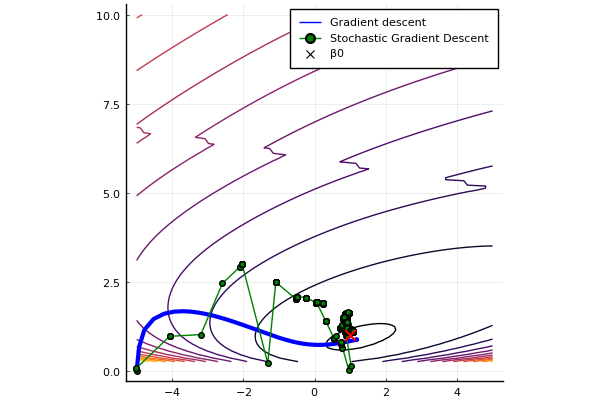

In [15]:
p = figures.contour_plot(L, [-5.0,5.0], [0.25, 10.0])
plot!(xpos, ypos, label="Gradient descent", linewidth=3, color=:blue)
plot!(xpos2, ypos2, label="Stochastic Gradient Descent", marker=:circle, color=:green)
scatter!([β0[1]],[β0[2]], marker=:x, markersize=8, label="β0",  color=:red)

### Constrained nonlinear optimisation

Given $f(\mathbf{x}) : \mathbb{R}^n \to \mathbb{R}$, we can combine what we have learned about gradient descent with what we have learned about linear programming to solve constrained nonlinear optimisation problems of the form:
$$
\min_{\mathbf{x}\in C} f(\mathbf{x}), 
$$
where $C \subset \mathbb{R}^n$ is defined by a set of linear inequalities.

Clearly GD alone is insufficient since $\mathbf{x}_n$ could leave the feasible set, $C$.


### Constrained nonlinear optimisation: Frank-Wolfe algorithm

Idea is to linearise $f(\mathbf{x})$ about $\mathbf{x}_n$ at each iteration of GD and solve the associated LP to obtain an $\mathbf{x}_{n+1}$, which cannot leave $C$ by construction.

Given current point, $\mathbf{x}_n$, 

$$
f(\mathbf{x}) = f(\mathbf{x}_n)+(\mathbf{x}-\mathbf{x}_n) \cdot \nabla\,f(\mathbf{x}_n) + \mathcal{O}(\left| \mathbf{x}-\mathbf{x}_n \right|^2).
$$

Neglecting the $\mathcal{O}(\left| \mathbf{x}-\mathbf{x}_n \right|^2)$ terms, minimisation of $f(\mathbf{x})$, is now a LP:

$$
x^* = \arg \min_{\mathbf{x}\in C}\ \left[ \mathbf{x} \cdot \nabla\,f(\mathbf{x}_n)\right]
$$

### Constrained nonlinear optimisation: Frank-Wolfe algorithm

Start from a point, $\mathbf{x}_0 \in C$. At each iteration, $n$:

1. Solve the linearised problem
$$
x^* = \arg \min_{\mathbf{x}\in C}\ \left[\mathbf{x} \cdot \nabla\,f(\mathbf{x}_n)\right]
$$
2. Perform *bounded* line minimisation of $f(\mathbf{x})$ from $\mathbf{x}_n$ in the direction of $\mathbf{x}^*-\mathbf{x}_n$: 
$$
\lambda^* = \arg \min_{\lambda \in \left[0,1\right]} f \left( \mathbf{x}_n + \lambda\,(\mathbf{x}^*-\mathbf{x}_n)\right)
$$
3. Update
$$
\mathbf{x}_{n+1} = \mathbf{x}_n + \lambda^* \,(\mathbf{x}^*-\mathbf{x}_n).
$$
4. Repeat until desired tolerance is reached.